In [2]:
import dask.dataframe as dd
import os
from tqdm import tqdm
from dask.distributed import Client, LocalCluster
data_path = "../Data/nyctaxi"
os.chdir(data_path)
fldr = "tests_partitions"
os.makedirs(fldr, exist_ok=True)
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:33275 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 16.50 GB


In [ ]:
for r in tqdm([0.5, 2, 4]): 
    df = dd.read_csv('raw/2016_Yellow_Taxi_Trip_Data.csv')
    nparts = df.npartitions
    if r != 1:
        nparts = int(nparts * r)
        df = df.repartition(npartitions=nparts)
    fldr_out = os.path.join(fldr, f"part_{nparts:05d}/")
    out = df.to_parquet(fldr_out,
                        write_index=False,
                        write_metadata_file=False)
    client.restart()

 50%|█████     | 1/2 [45:14<45:14, 2714.61s/it]

# tests

In [1]:
from dask.distributed import Client, LocalCluster
import dask.dataframe as dd
import os
data_path = "../Data/nyctaxi"
os.chdir(data_path)
fldr = "tests_partitions"
os.makedirs(fldr, exist_ok=True)
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:45657 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 16.50 GB


In [3]:
!ls tests_partitions

part_00135  part_00271	part_00542  part_01084


## step2

In [2]:
%%time
ddf = dd.read_parquet(os.path.join(fldr, "part_00135/"),
                     columns=["VendorID", "passenger_count"])
grp = ddf.groupby("VendorID")["passenger_count"]\
         .sum().compute()

CPU times: user 2.19 s, sys: 260 ms, total: 2.45 s
Wall time: 8.79 s


CPU times: user 2.19 s, sys: 260 ms, total: 2.45 s
Wall time: 8.79 s


## step3

In [2]:
%%time
ddf = dd.read_parquet("part_parquet_stage1/year=2016/"),
                      columns=["VendorID", "passenger_count"])
grp = ddf.groupby("VendorID")["passenger_count"]\
         .sum().compute()

CPU times: user 3.22 s, sys: 221 ms, total: 3.45 s
Wall time: 10.6 s


CPU times: user 3.22 s, sys: 221 ms, total: 3.45 s
Wall time: 10.6 s

## step4

In [2]:
%%time
ddf = dd.read_parquet(os.path.join(fldr, "part_00542/"),
                      columns=["VendorID", "passenger_count"])
grp = ddf.groupby("VendorID")["passenger_count"]\
         .sum().compute()

CPU times: user 4.58 s, sys: 393 ms, total: 4.97 s
Wall time: 12.7 s


CPU times: user 4.58 s, sys: 393 ms, total: 4.97 s
Wall time: 12.7 s

## step5

In [2]:
%%time
ddf = dd.read_parquet(os.path.join(fldr, "part_01084/"),
                     columns=["VendorID", "passenger_count"])
grp = ddf.groupby("VendorID")["passenger_count"]\
         .sum().compute()

CPU times: user 12 s, sys: 888 ms, total: 12.9 s
Wall time: 39 s


CPU times: user 12 s, sys: 888 ms, total: 12.9 s
Wall time: 39 s

# Writing

In [ ]:
import dask.dataframe as dd
import os
data_path = "../Data/nyctaxi"
os.chdir(data_path)

In [2]:
df = dd.read_csv('raw/2016_Yellow_Taxi_Trip_Data.csv')

In [4]:
df.npartitions

271

In [1]:
import plotly.express as px
import plotly.graph_objects as go

large_rockwell_template = dict(
    layout=go.Layout(title_font=dict(family="Rockwell", size=24))
)

In [2]:
import pandas as pd

In [12]:
df = pd.DataFrame({"Partitions": ['n=135', 'n=271', 'n=542', 'n=1084'],
                   "Timing": [8.79, 10.6, 12.7, 39 ]})

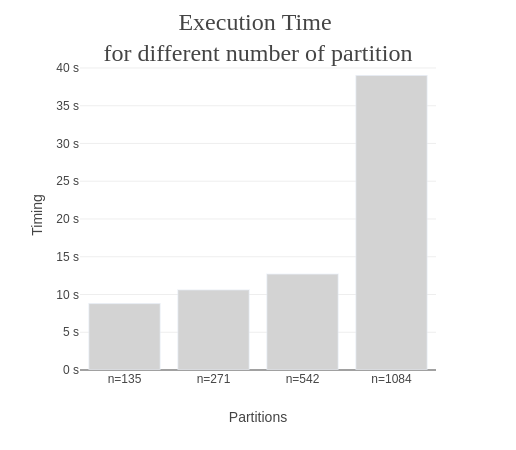

In [16]:
fig = px.bar(df,
             x="Partitions",
             y="Timing",)
fig.update_traces(marker={"color":"lightgrey"})\
   .update_layout(title="Execution Time <br>for different number of partition",
                  title_x=0.5,
                  yaxis_ticksuffix = ' s',
                  template=large_rockwell_template)
fig.show()

In [11]:
go.Bar(x=df["Partitions"], y=df["Timing"])

Bar({
    'x': array(['135', '271', '542', '1084'], dtype=object), 'y': array([ 8.79, 10.6 , 12.7 , 39.  ])
})